# 降维 

本节代码参考: 书籍代码 https://github.com/ageron/handson-ml3 推荐自学 


降维：减少特征矩阵中特征的数量

降维目的：算法运算更快，效果更好，提高可视化可能性（因为三维以上的数据可视化的难度大）

它可以被认为是一种投影方法，将具有m列特征的数据投影到具有m或者更少列的子空间中，同时保留原始数据的本质。


In [1]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [2]:
from pathlib import Path

IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np

## 1 PCA主成分分析 
PCA：主成分分析（Principal Component Analysis）是一种使用线性映射来进行数据降维的方法，同时去除数据的相关性，以最大限度保持原始数据的方差信息。

- PCA就是要找出数据最主要的方面来代替原始数据。
- PCA通常用于高维数据集的探索和可视化，还可以用作数据的压缩和预处理。

In [4]:
mnist = fetch_openml('mnist_784', as_frame=False)
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1  # d equals 154
d

154

In [5]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [6]:
pca.n_components_

154

In [7]:
pca.explained_variance_ratio_.sum()  

0.9501960192613031

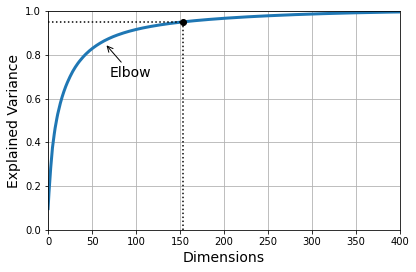

In [8]:

plt.figure(figsize=(6, 4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"))
plt.grid(True)
save_fig("explained_variance_plot")
plt.show()

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

clf = make_pipeline(PCA(random_state=2023), SGDClassifier())
param_grid = {"pca__n_components": np.arange(10, 80)}
grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X_train[:1000], y_train[:1000])

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pca', PCA(random_state=2023)),
                                       ('sgdclassifier', SGDClassifier())]),
             param_grid={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79])})

In [10]:
grid_search.best_params_

{'pca__n_components': 70}

## 2 PCA对人脸数据集的降维 


In [11]:
#01 导入库
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# 02 实例化数据集
faces = fetch_lfw_people(min_faces_per_person=60)
faces.data.shape,faces.images.shape
# 62×47指图像分辨率  1348指的是样本数

((1348, 2914), (1348, 62, 47))

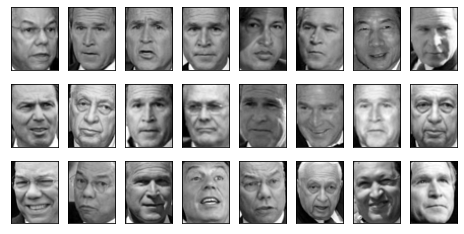

In [13]:
# 03 特征矩阵的可视化
fig, axes = plt.subplots(3,8  #20个图像
                        ,figsize=(8,4)
                        ,subplot_kw = {"xticks":[],"yticks":[]}
                        )
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.images[i,:,:]
    ,cmap="gray" )

In [14]:
X=faces.data
X.shape # (1348, 2914)　此时X变成二维的数据 2194=62x47

(1348, 2914)

In [15]:
# 04 建模降维并提取新的特征空间矩阵
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)
# 将2914个特征通过PCA进行降维，并且使用fit进行实例化
V = pca.components_
V.shape

(184, 2914)

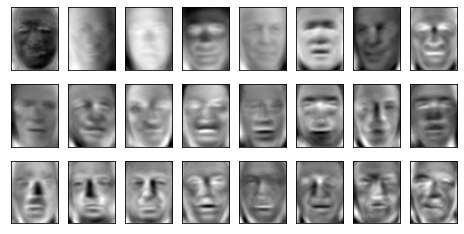

In [16]:
# 05 新的特征空间矩阵进行可视化 
fig, axes = plt.subplots(3,8,figsize=(8,4),subplot_kw = {"xticks":[],"yticks":[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(V[i,:].reshape(62,47),cmap="gray")

##  3 PCA对红酒数据可视化

In [17]:
# PCA可视化——在三维空间下
# 以红酒数据为例子
from sklearn.datasets import load_wine
winedata = load_wine()
X, y = winedata['data'], winedata['target']
X.shape,y.shape,winedata.target_names
# 178个样本，13个特征

((178, 13), (178,), array(['class_0', 'class_1', 'class_2'], dtype='<U7'))

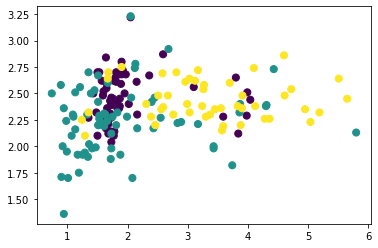

In [18]:
#选择任意两个特征进行绘图
import matplotlib.pyplot as plt
plt.scatter(X[:,1], X[:,2], c=y,s=50) # S代表点的大小
plt.show()

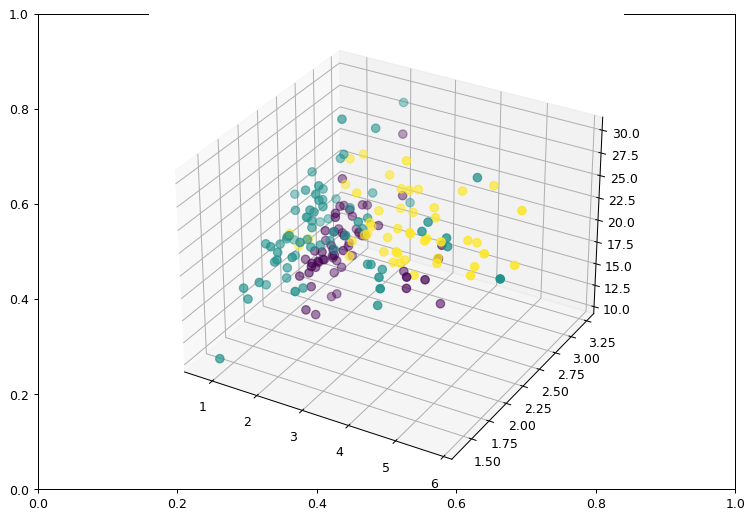

In [19]:
#选择三个特征进行三维数据展示
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(10,7),dpi=90)
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,1], X[:,2], X[:,3],c=y,s=45)  #三维以上呢?
plt.show()

可以看到对于上图中三维的数据，要将点根据颜色区分，显然比二维的难度更大，这也就是降维的目的所在。

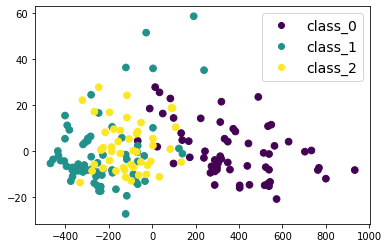

In [20]:
from sklearn.decomposition import PCA
pca = PCA(random_state=2023)
Xt = pca.fit_transform(X)  #一步到位

plot = plt.scatter(Xt[:,0], Xt[:,1], c=y,s=45)
plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
plt.show()

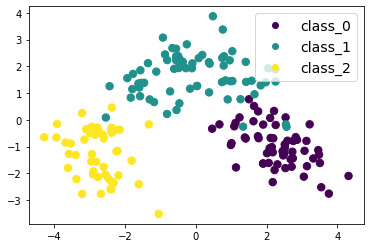

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pca = PCA(random_state=2023)

pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])  #缩放数据

Xt = pipe.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y,s=55)
plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
plt.show()